In [1]:
from explanation import Explanation
from naive_bayes_classif.filter import *
from naive_bayes_classif.quality import compute_quality_for_corpus
from text_lime import *
import pprint

## Naive Bayesian Filter
### Training
* First we train our Naive Bayesian Spam-filter on the training data:


In [2]:
classif = Filter()
classif.train("data/1")

### Testing and Efficiency
* With given confusion matrix we can calculate its quality:

In [3]:
average_spam_value = classif.test("data/2")

filter_efficiency = compute_quality_for_corpus("data/2")
print(filter_efficiency)

{'tp': 365, 'tn': 153, 'fp': 0, 'fn': 96}
0.8436482084690554


### Inherent Interpretability
* Thanks to its relative simplicity (via its formula), the NBF has the property of certain interpretability:

In [4]:
path_to_instance = "data/2/01286.80a17353e03cab185cb52237b60359e4.txt"
probs, relevant_words = classif.test_instance(path_to_instance, n_words=10)

* We can see its most relevant words according to its inherent interpretability:

In [5]:
pprint.pprint(relevant_words) # can be removed

[('webmaster', 0.9523809523809523),
 ('removed', 0.8860759493670887),
 ('receive', 0.823529411764706),
 ('priority', 0.7857142857142856),
 ('earning', 0.7692307692307693),
 ('confidential', 0.7500000000000001),
 ('classes', 0.7352941176470588),
 ('verified', 0.7),
 ('confidentiality', 0.7),
 ('deliver', 0.6785714285714286)]


In [6]:
bayes_interpretation = Explanation(relevant_words, plot_title="Naive Bayes Classifier Interpretation", 
                                       x_label="partial probabilities")
bayes_interpretation.text_plot()

,Values
Features,
webmaster,0.952381
removed,0.886076
receive,0.823529
priority,0.785714
earning,0.769231
confidential,0.750000
classes,0.735294
verified,0.700000
confidentiality,0.700000


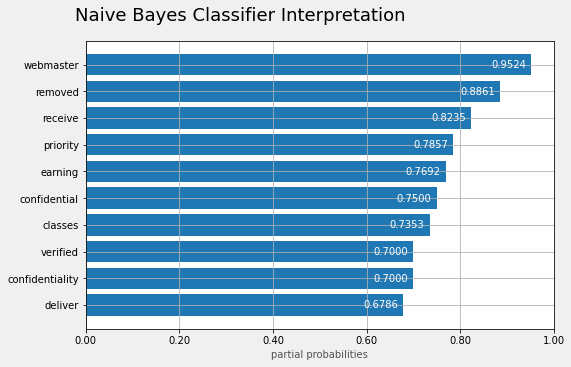

In [7]:
bayes_interpretation.graph_plot()

## LIME
### Shapley
* If we try to explain the instance using the LIME method for expalanation and adjust the weights to the size of the coalitions, the task leads to the Shapley values:

In [8]:
limeTextExplainer = LimeTextExplainer(path_to_instance, classif, relevant_words, average_spam_value)
shapley_explanation_values = limeTextExplainer.explain_instance(weight_type="shapley")

In [9]:
print(shapley_explanation_values)
np.sum(np.array(shapley_explanation_values))

[-0.05873961 -0.02268564  0.0020367   0.01605241  0.02124584 -0.02066574
  0.03123251  0.02064249 -0.02066574  0.06333259]


0.03178580773415657

In [10]:
shapley_explanation = list(zip([word[0] for word in relevant_words], shapley_explanation_values))
pprint.pprint(shapley_explanation)

[('webmaster', -0.0587396139593202),
 ('removed', -0.022685641394025555),
 ('receive', 0.0020367020626698828),
 ('priority', 0.016052409887957336),
 ('earning', 0.021245842525761442),
 ('confidential', -0.02066574200473263),
 ('classes', 0.031232512151839753),
 ('verified', 0.020642486037890453),
 ('confidentiality', -0.020665742004732673),
 ('deliver', 0.06333259443084875)]


In [11]:
shapley_visualization = Explanation(shapley_explanation, plot_title="Shapley Explanation", 
                                       x_label="shapley values")
shapley_visualization.text_plot()

,Values
Features,
webmaster,-0.058740
removed,-0.022686
receive,0.002037
priority,0.016052
earning,0.021246
confidential,-0.020666
classes,0.031233
verified,0.020642
confidentiality,-0.020666


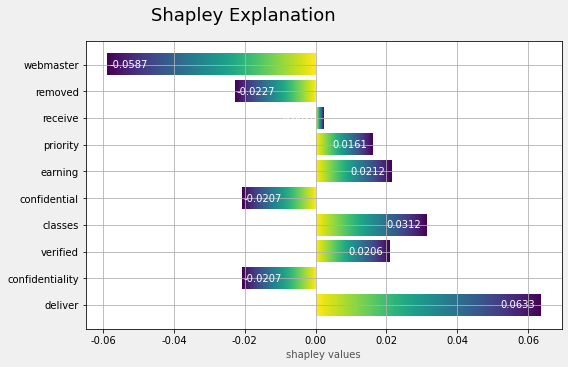

In [12]:
shapley_visualization.graph_plot(gradient=True)

### Banzhaf

* On the other hand, if we assign equal weight to each coalition in LIME we get so called banzhaf values:


In [13]:
banzhaf_explanation_values = limeTextExplainer.explain_instance(weight_type="banzhaf")

In [14]:
banzhaf_explanation = list(zip([word[0] for word in relevant_words], banzhaf_explanation_values))
pprint.pprint(banzhaf_explanation)

[('webmaster', -0.01737009005176668),
 ('removed', -0.007417489854033073),
 ('receive', 0.00021676440223799068),
 ('priority', 0.004824807836283153),
 ('earning', 0.006583238369581642),
 ('confidential', 0.0002960772584918586),
 ('classes', 0.010041667570846794),
 ('verified', 0.006377534016720874),
 ('confidentiality', 0.00029607725849184127),
 ('deliver', 0.02176551302330016)]


In [17]:
banzhaf_visualization = Explanation(banzhaf_explanation, plot_title="Banzhaf Explanation", 
                                       x_label="shapley values")
banzhaf_visualization.text_plot()

,Values
Features,
webmaster,-0.017370
removed,-0.007417
receive,0.000217
priority,0.004825
earning,0.006583
confidential,0.000296
classes,0.010042
verified,0.006378
confidentiality,0.000296


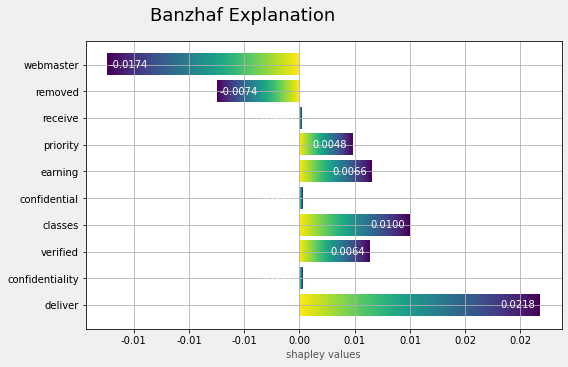

In [18]:
banzhaf_visualization.graph_plot(gradient=True)